In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Mon Aug 29 02:43:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## I. Download Dataset

### 1.2 Vietnamese_Dataset
https://github.com/VinAIResearch/dict-guided#dataset

Input format: x1,y1,x2,y2,x3,y3,x4,y4,TRANSCRIPT

In [13]:
!mkdir /content/Dataset
%cd /content/Dataset
!gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
!unzip vietnamese_original.zip

/content/Dataset
Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/Dataset/vietnamese_original.zip
100% 1.05G/1.05G [00:03<00:00, 264MB/s]
Archive:  vietnamese_original.zip
   creating: vietnamese/
  inflating: vietnamese/general_dict.txt  
  inflating: vietnamese/vn_dictionary.txt  
   creating: vietnamese/train_images/
  inflating: vietnamese/train_images/im0722.jpg  
  inflating: vietnamese/train_images/im0234.jpg  
  inflating: vietnamese/train_images/im0781.jpg  
  inflating: vietnamese/train_images/im0318.jpg  
  inflating: vietnamese/train_images/im0851.jpg  
  inflating: vietnamese/train_images/im1022.jpg  
  inflating: vietnamese/train_images/im0041.jpg  
  inflating: vietnamese/train_images/im1090.jpg  
  inflating: vietnamese/train_images/im0674.jpg  
  inflating: vietnamese/train_images/im1013.jpg  
  inflating: vietnamese/train_images/im0200.jpg  
  inflating: vietnamese/train_images/im1062.jpg  
  inflating: vietnamese/trai

### 1.3 QNAI Dataset

In [14]:
%cd /content/Dataset
!gdown https://drive.google.com/uc?id=1dpbsK9bNklcE4FQ7WuEvT6wHo48ARM9y
!unzip AI_Hackathon_Problem1.zip

/content/Dataset
Downloading...
From: https://drive.google.com/uc?id=1dpbsK9bNklcE4FQ7WuEvT6wHo48ARM9y
To: /content/Dataset/AI_Hackathon_Problem1.zip
100% 503M/503M [00:01<00:00, 294MB/s]
Archive:  AI_Hackathon_Problem1.zip
   creating: AI Hackathon-Problem1/
  inflating: __MACOSX/._AI Hackathon-Problem1  
  inflating: AI Hackathon-Problem1/.DS_Store  
  inflating: __MACOSX/AI Hackathon-Problem1/._.DS_Store  
  inflating: AI Hackathon-Problem1/Data Labeling_Đề 01_ AI Hackathon.xlsx  
  inflating: __MACOSX/AI Hackathon-Problem1/._Data Labeling_Đề 01_ AI Hackathon.xlsx  
   creating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/
  inflating: __MACOSX/AI Hackathon-Problem1/._Data Menu_Đề 1_AI Hackathon  
  inflating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/723.jpeg  
  inflating: __MACOSX/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/._723.jpeg  
  inflating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/689.jpeg  
  inflating: __MACOSX/AI Hackathon-Pr

In [15]:
%cd '/content/Dataset'
!gdown https://drive.google.com/uc?id=1tnKNcrHz7LT0z1Zrz-uuVkofq18j_UAt

/content/Dataset
Downloading...
From: https://drive.google.com/uc?id=1tnKNcrHz7LT0z1Zrz-uuVkofq18j_UAt
To: /content/Dataset/label_menu.txt
100% 7.31M/7.31M [00:00<00:00, 241MB/s]


## II. Clone Code PaddleOCR

In [4]:
%cd /content
!git clone https://github.com/dotrannhattuong/Smart_menu_OCR.git

/content
Cloning into 'Smart_menu_OCR'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 423 (delta 19), reused 47 (delta 14), pack-reused 367
Receiving objects: 100% (423/423), 90.56 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [5]:
%cd /content
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 42195, done.
remote: Counting objects: 100% (435/435), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 42195 (delta 237), reused 337 (delta 186), pack-reused 41760
Receiving objects: 100% (42195/42195), 335.90 MiB | 23.80 MiB/s, done.
Resolving deltas: 100% (29644/29644), done.


## III. Install Enviroment

In [6]:
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install paddlepaddle-gpu 
!pip install PyYAML==5.4.1
!pip3 install paddleslim==2.2.2
# !pip install split-folders
!pip3 install lanms-nova

/content/PaddleOCR
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 604 kB 4.2 MB/s 
     |████████████████████████████████| 4.9 MB 63.6 MB/s 
     |████████████████████████████████| 2.2 MB 26.6 MB/s 
     |████████████████████████████████| 204 kB 69.2 MB/s 
     |████████████████████████████████| 104 kB 76.1 MB/s 
     |████████████████████████████████| 399 kB 74.0 MB/s 
     |████████████████████████████████| 2.3 MB 64.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.0 MB 25 kB/s 
     |████████████████████████████████| 394 kB 63.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 3.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
  

## IV. Text Detection

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/detection_en.md

### 4.1 Image Processing

In [17]:
import os

path = '/content/Dataset/vietnamese/test_image'
files_test_image = os.listdir(path)
print('len_test: ', len(files_test_image))
print('min_test: ', min(files_test_image))
print('max_test: ', max(files_test_image))
print('-'*60)

path = '/content/Dataset/vietnamese/train_images'
files = os.listdir(path)
print('len_train: ', len(files))
print('min_train: ', min(files))
print('max_train: ', max(files))
print('-'*60)

path = '/content/Dataset/vietnamese/unseen_test_images'
files = os.listdir(path)
print('len_unseen: ', len(files))
print('min_unseen: ', min(files))
print('max_unseen: ', max(files))
print('-'*60)

path = '/content/Dataset/vietnamese/labels'
files = [int(fl.split('.txt')[0].split('_')[1]) for fl in os.listdir(path)]
print('len_label: ', len(files))
print('min_label: ', min(files))
print('max_label: ', max(files))
print('-'*60)

len_test:  300
min_test:  im1201.jpg
max_test:  im1500.jpg
------------------------------------------------------------
len_train:  1200
min_train:  im0001.jpg
max_train:  im1200.jpg
------------------------------------------------------------
len_unseen:  500
min_unseen:  im1501.jpg
max_unseen:  im2000.jpg
------------------------------------------------------------
len_label:  2000
min_label:  1
max_label:  2000
------------------------------------------------------------


#### Format Data

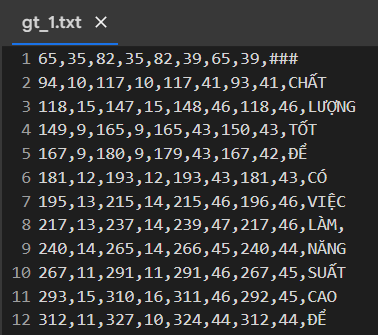

Text Detection: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/dataset/ocr_datasets_en.md

Data format: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/dataset/ocr_datasets_en.md

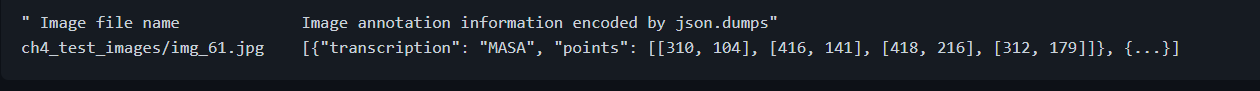

In [18]:
import glob 
import json

path = glob.glob('/content/Dataset/vietnamese/labels/*')

train_label = open("/content/Dataset/train_label.txt","w")
test_label = open("/content/Dataset/test_label.txt","w")
useen_label = open("/content/Dataset/useen_label.txt","w")

for file in path:
  with open(file, 'r') as f:
    lines = f.readlines()
  
  label = []
  for line in lines:
    line = line.strip()
    text_box = {}
    c = line.split(',', 8)
    text_box["transcription"] = c[-1]
    text_box["points"] = [[c[0],c[1]],[c[2],c[3]], [c[4],c[5]],[c[6],c[7]]]
    label.append(text_box)

  label = json.dumps(label, ensure_ascii=False)
  label_name = os.path.basename(file).split('.')[0].split('_')[1]
  int_number = int(label_name)
  img_name = 'im' + "{:04n}".format(int(int_number)) + '.jpg'

  if int_number <= 1200:
    train_label.write('vietnamese/train_images/' + img_name + '\t' + f'{label}' + '\n')
  elif int_number > 1500:
    useen_label.write('vietnamese/unseen_test_images/' + img_name + '\t' + f'{label}' + '\n')
  else:
    test_label.write('vietnamese/test_image/' + img_name + '\t' + f'{label}' + '\n')

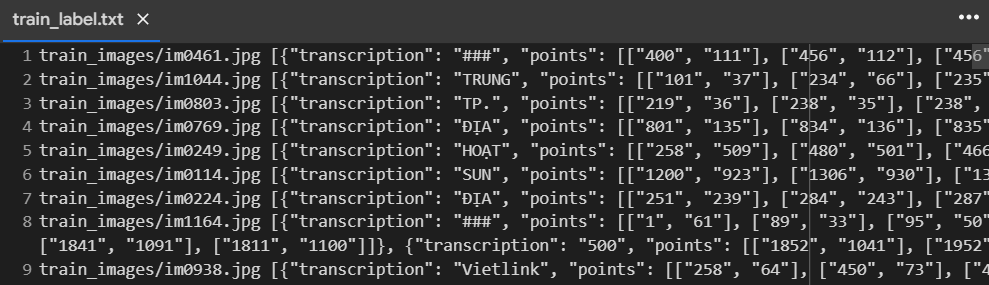

In [21]:
import os

test_label = '/content/Dataset/test_label.txt'
with open(test_label, 'r') as f:
  lines = f.readlines()
print("test_label: {}".format(len(lines)))

train_label = '/content/Dataset/train_label.txt'
with open(train_label, 'r') as f:
  lines = f.readlines()
print("train_labels: {}".format(len(lines)))

useen_label = '/content/Dataset/useen_label.txt'
with open(useen_label, 'r') as f:
  lines = f.readlines()
print("useen_label: {}".format(len(lines)))

test_label: 300
train_labels: 1200
useen_label: 500


#### Split data

In [10]:
import glob 
import json
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def split_txt_file(path):
  with open(path, 'r') as f:
    lines = f.readlines()

  list_label_train, list_label_test = train_test_split(lines, test_size=0.2, shuffle=True)
  list_label_train, list_label_val = train_test_split(list_label_train, test_size=0.125, shuffle=True)

  train_path = '/content/train_' + path.split('/')[-1]
  test_path = '/content/test_' + path.split('/')[-1]
  val_path = '/content/val_' + path.split('/')[-1]

  with open(test_path, 'w') as fi:
      for line in list_label_test:
          fi.write(line)

  with open(train_path, 'w') as fi:
      for line in list_label_train:
          fi.write(line)
  
  with open(val_path, 'w') as fi:
      for line in list_label_val:
          fi.write(line)

In [22]:
with open('/content/datadet.txt', 'w', encoding='utf-8') as f:
  txt_files = glob.glob('/content/Dataset/*.txt')
  for txt_file in txt_files:
    with open(txt_file, 'rb') as fs:
      lines = fs.readlines()
    lines = [line.decode('utf-8') for line in lines]
    print(txt_file,'\t',len(lines))

    for line in lines:
      f.write(line)

with open('/content/datadet.txt', 'rb') as f:
  lines=f.readlines()

print('-'*60)
len(lines)

/content/Dataset/test_label.txt 	 300
/content/Dataset/useen_label.txt 	 500
/content/Dataset/label_menu.txt 	 731
/content/Dataset/train_label.txt 	 1200
------------------------------------------------------------


2731

In [23]:
split_txt_file('/content/datadet.txt')

with open('/content/train_datadet.txt', 'r') as f:
  train_lines=f.readlines()

with open('/content/test_datadet.txt', 'r') as f:
  test_lines=f.readlines()

with open('/content/val_datadet.txt', 'r') as f:
  val_lines=f.readlines()

print(len(train_lines))
print(len(test_lines))
print(len(val_lines))

1911
547
273


### 4.2 Download pretrain model


In [ ]:
%cd /content
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_distill_train.tar
# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_det_distill_train.tar && rm -rf en_PP-OCRv3_det_distill_train.tar

/content
--2022-08-31 08:46:58--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_distill_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 220.181.33.43, 220.181.33.44, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|220.181.33.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139335680 (133M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_det_distill_train.tar’

en_PP-OCRv3_det_dis 100%[===================>] 132.88M  13.7MB/s    in 91s     

2022-08-31 08:48:32 (1.46 MB/s) - ‘./pretrain_models/en_PP-OCRv3_det_distill_train.tar’ saved [139335680/139335680]

/content/pretrain_models


### 4.3 Traning

#### 4.3.1 Start training

In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py \
-c /content/Smart_menu_OCR/configs/det_ppocrv3.yml \
-o Global.pretrained_model=/content/pretrain_models/en_PP-OCRv3_det_distill_train/best_accuracy  \
Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/det_ppocrv3 \
Optimizer.base_lr=0.0001

Streaming output truncated to the last 5000 lines.
[2022/08/27 15:17:28] ppocr INFO: epoch: [106/500], global_step: 28740, lr: 0.000898, loss: 1.479875, loss_shrink_maps: 0.792161, loss_threshold_maps: 0.556917, loss_binary_maps: 0.157657, avg_reader_cost: 0.64887 s, avg_batch_cost: 0.98371 s, avg_samples: 8.0, ips: 8.13247 samples/s, eta: 1 day, 1:29:49
[2022/08/27 15:17:36] ppocr INFO: epoch: [106/500], global_step: 28750, lr: 0.000898, loss: 1.596751, loss_shrink_maps: 0.843520, loss_threshold_maps: 0.597146, loss_binary_maps: 0.168472, avg_reader_cost: 0.43272 s, avg_batch_cost: 0.78809 s, avg_samples: 8.0, ips: 10.15106 samples/s, eta: 1 day, 1:29:38
[2022/08/27 15:17:47] ppocr INFO: epoch: [106/500], global_step: 28760, lr: 0.000898, loss: 1.630560, loss_shrink_maps: 0.902382, loss_threshold_maps: 0.565629, loss_binary_maps: 0.179453, avg_reader_cost: 0.64613 s, avg_batch_cost: 0.99716 s, avg_samples: 8.0, ips: 8.02275 samples/s, eta: 1 day, 1:29:35
[2022/08/27 15:17:56] ppocr IN

#### 4.3.2 Load Trained Model and Continue Training

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
-c /content/Smart_menu_OCR/configs/det_ppocrv3.yml \
-o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/det_ppocrv3/latest  \
Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/det_ppocrv3

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
[2022/08/29 04:48:27] ppocr INFO: Architecture : 
[2022/08/29 04:48:28] ppocr INFO:     Backbone : 
[2022/08/29 04:48:28] ppocr INFO:         disable_se : True
[2022/08/29 04:48:28] ppocr INFO:         model_name : large
[2022/08/29 04:48:28] ppocr INFO:         name : MobileNetV3
[2022/08/29 04:48:28] ppocr INFO:         scale : 0.5
[2022/08/29 04:48:28] ppocr INFO:     Head : 
[2022/08/29 04:48:28] ppocr INFO:         k : 50
[2022/08/29 04:48:28] ppocr INFO:         name : DBHead
[2022/08/29 04:48:28] ppocr INFO:     Neck : 
[2022/08/29 04:48:28] ppocr INFO:         name : RSEFPN
[2022/08/29 04:48:28] ppocr INFO:         out_channels : 96
[2022/08/29 04:48:28] ppocr INFO:         shortcut : True
[2022/08/29 04:48:28] ppocr INFO:     Transform : None
[2022/08/29 04:48:28] ppocr INFO:     algorithm : DB
[2022/08/29 04:48:28] ppocr INFO:     model_type : det
[2022/08/29 04:48:28] ppocr IN